### Student Information
Name: 何品萱

Student ID: 111065512

GitHub ID: piinshiuan

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

# First Part

In [600]:
import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import math

# Define the categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# Obtain the documents containing the categories provided
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [609]:
# Self-defined function
import helpers.data_mining_helpers as dmh

# Construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [610]:
# Add category to the dataframe
X['category'] = twenty_train.target
# Add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [611]:
X

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [21]:
# Using loc to show the 2254-2256 record's category name 
X.loc[2254:2256, 'category_name']

2254    sci.med
2255    sci.med
2256    sci.med
Name: category_name, dtype: object

In [25]:
# Using iloc to show the 2254-2255 record's category name(2)
X.iloc[2254:2256, 2]

2254    sci.med
2255    sci.med
Name: category_name, dtype: object

In [17]:
# Only show text and category column
X[['text','category']]

,text,category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3
...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.
​
Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [604]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [605]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

### Answer
Because is null function can only detect NaN type and None type, str 'NaN' and 'None' can't consider the same as it. That's the reason why we can't use isnull() function for detecting that kind of missing data

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [612]:
X

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


In [615]:
X_sample = X.sample(n=1000) 
print(len(X_sample))
X_sample

1000


,text,category,category_name
614,From: pharvey@quack.kfu.com (Paul Harvey) Subj...,3,soc.religion.christian
1470,From: brein@jplpost.jpl.nasa.gov (Barry S. Rei...,2,sci.med
1261,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
238,Subject: Origin of Morphine From: chinsz@eis.c...,2,sci.med
1444,From: jchen@wind.bellcore.com (Jason Chen) Sub...,2,sci.med
...,...,...,...
1143,From: gsu0033@uxa.ecn.bgu.edu (Eric Molas) Sub...,3,soc.religion.christian
1571,From: nerone@ccwf.cc.utexas.edu (Michael Neron...,1,comp.graphics
1407,From: hl7204@eehp22 (H L) Subject: Re: Graphic...,1,comp.graphics
1580,From: davec@silicon.csci.csusb.edu (Dave Chowe...,0,alt.atheism


In [619]:
X_sample.loc[0]

text             From: sd345@city.ac.uk (Michael Collier) Subje...
category                                                         1
category_name                                        comp.graphics
Name: 0, dtype: object

In [614]:
X

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


### Answer
The difference I aware is that X_sample take the data from X, but it still keep the index of the original data.\
So if you want to take the first record of X_sample, X_sample.loc[0] may not give you your desired result.

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

<AxesSubplot:title={'center':'Category distribution for X'}>

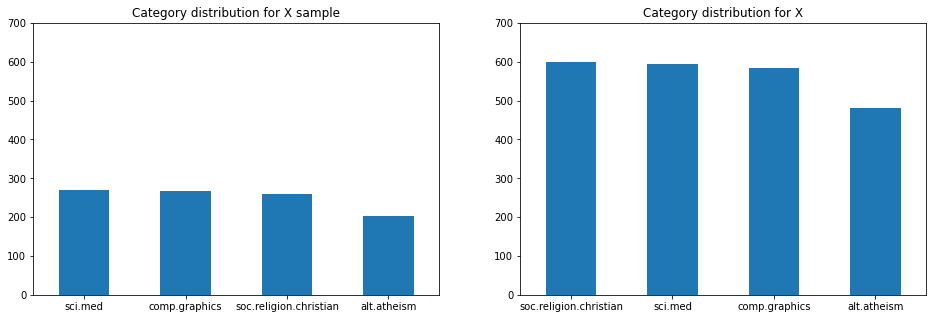

In [627]:
# Plot the category distribution chart for X and X_sample
fig = plt.figure(figsize = (15, 100))
ax = fig.add_subplot(1, 2, 1)
# plot barchart for X sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution for X sample',
                                    ylim = [0, 700],        
                                    rot = 0, fontsize = 10, figsize = (16,5))
# plot barchart for X
ax = fig.add_subplot(1, 2, 2)
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution for X',
                                    ylim = [0, 700],        
                                    rot = 0, fontsize = 10, figsize = (16,5))

### Answer

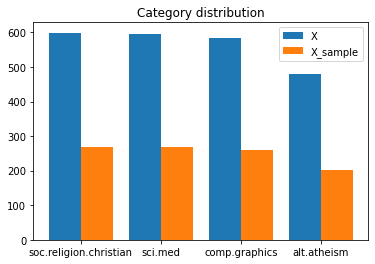

In [630]:
# Draw two dataset in the same graph
X_value_count = X.category_name.value_counts()
X_sample_count = X_sample.category_name.value_counts()
  
X_axis = np.arange(len(X_value_count))
  
plt.bar(X_axis - 0.2, X_value_count, 0.4, label = 'X')
plt.bar(X_axis + 0.2, X_sample_count, 0.4, label = 'X_sample')
  

plt.xticks(X_axis, X_value_count.index)
plt.title("Category distribution")
plt.legend()
plt.show()

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [631]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

# Get the fifthe record 
fifth_record = X_counts[0:5, 0:100].toarray()[4]
fifth_record

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [632]:
# Find the 1's position in the fifth record
index_for_1= np.where(fifth_record == 1)
index_for_1

(array([ 0, 37], dtype=int64),)

In [633]:
# Get the represent word of it
count_vect.get_feature_names_out()[index_for_1[0][1]]

'01'

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

### Answer
Try to only show the most frequent word in those document, which we could get more meaningful visualization, instead of a really sparse matrix.

In [644]:
from sklearn.feature_extraction.text import CountVectorizer

# Max feature: Only find the top word ordered by term frequency across the corpus.
count_vect_feature = CountVectorizer(max_features=100)
X_counts_feature = count_vect_feature.fit_transform(X.text) # learn the vocabulary and return document-term matrix
X_counts_feature.toarray()
# doc_num = 20
term_num = 50
plot_x = ["term_"+str(i) for i in count_vect_feature.get_feature_names_out()[0:term_num ]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts_feature [0:20, 0:term_num ].toarray() #X_counts[how many documents, how many terms]

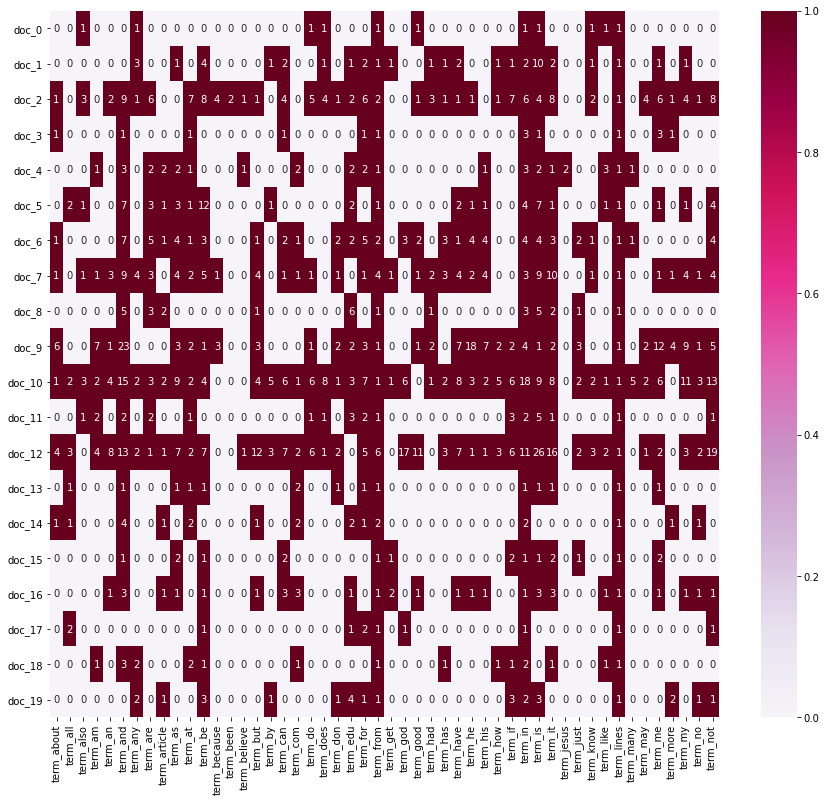

In [645]:
import seaborn as sns

# Draw it in heatmap
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(15, 13))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [646]:
from sklearn.decomposition import PCA
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [647]:
# Set Component to 3 
X_reduced_3 = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_reduced_3.shape

(2257, 3)

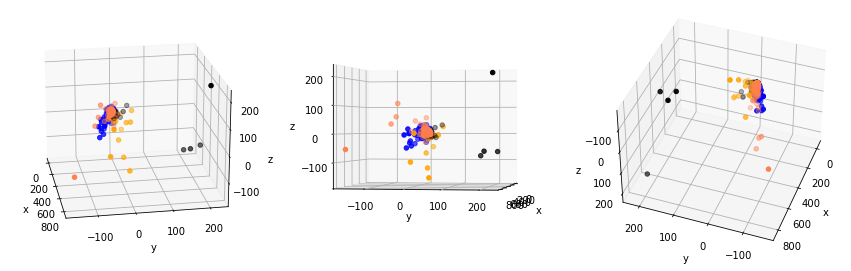

In [656]:
# Show the 3D plot in different angle
col = ['coral', 'blue', 'black', 'orange']
fig = plt.figure(figsize = (15, 8))

# The First angle
ax = fig.add_subplot(1, 3, 1, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced_3[X['category_name']  == category].T[0]
    ys = X_reduced_3[X['category_name'] == category].T[1]
    zs = X_reduced_3[X['category_name']  == category].T[2]
    ax.scatter(xs, ys, zs,  c = c, marker='o')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(20, -10)

# The second angle 
ax = fig.add_subplot(1, 3, 2, projection='3d')
for c, category in zip(col, categories):
    xs = X_reduced_3[X['category_name']  == category].T[0]
    ys = X_reduced_3[X['category_name']  == category].T[1]
    zs = X_reduced_3[X['category_name']  == category].T[2]
    ax.scatter(xs, ys, zs,  c = c, marker='o')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(0, 10)

# The third angle
ax = fig.add_subplot(1, 3, 3, projection='3d')
for c, category in zip(col, categories):
    xs = X_reduced_3[X['category_name']  == category].T[0]
    ys = X_reduced_3[X['category_name']  == category].T[1]
    zs = X_reduced_3[X['category_name']  == category].T[2]
    ax.scatter(xs, ys, zs,  c = c, marker='o')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(-140, 160)

plt.show()

### Answer
When reducing the data dimension into 2D,  most of the data looks crowded all together. For 3 dimensional data, may because it could somehow keep more information of the data, when looking at the data in different angle, we could see the distribution of different category more clear.

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [659]:
# Compute the term frequency
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

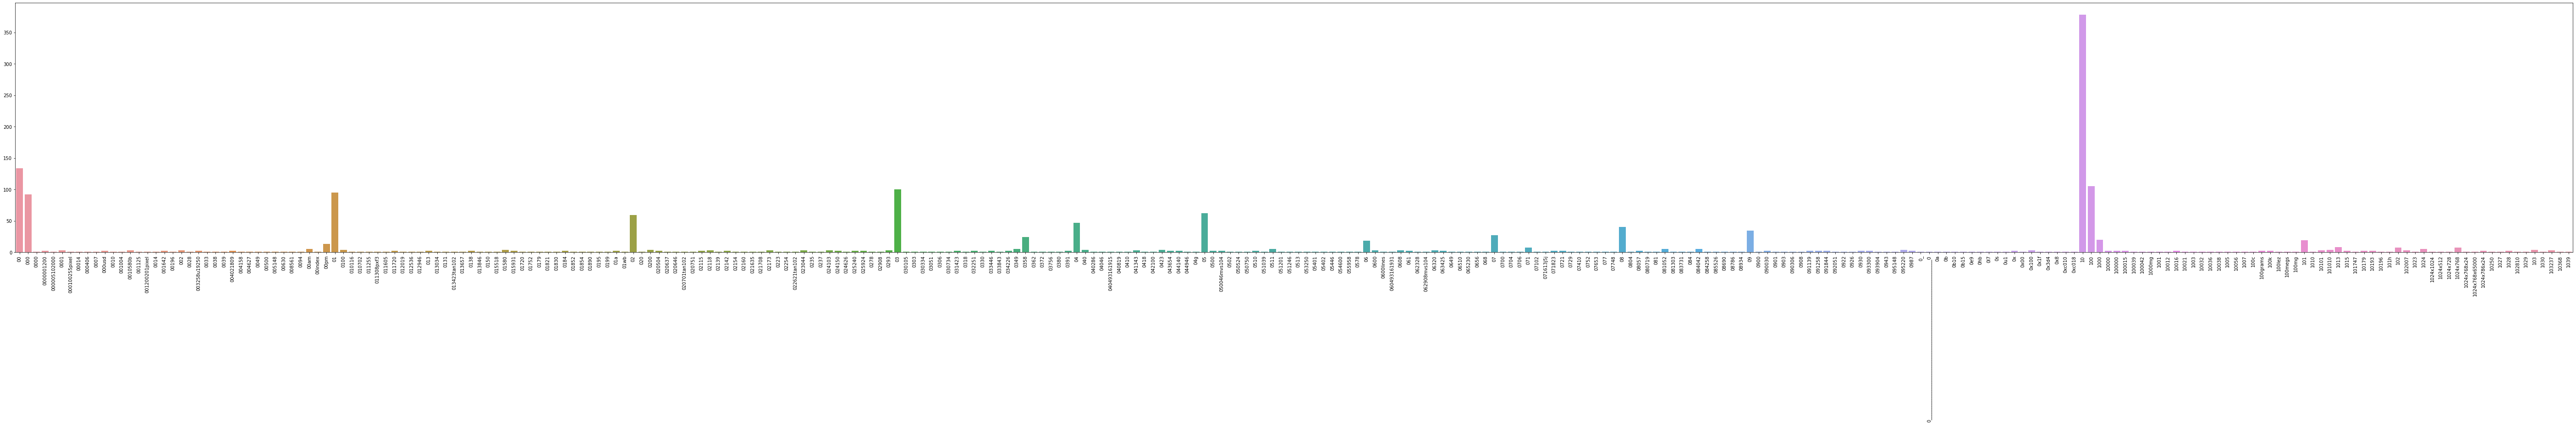

In [662]:
# Caculate the term frequency
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
# Show the term frequency in graph
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [663]:
import plotly.express as px
# Use plotly to draw the graph
d = {'x': count_vect.get_feature_names_out()[:300], 'y': term_frequencies[:300]}
df = pd.DataFrame(data=d)
fig = px.bar(df, x='x', y='y')
fig.show()

### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [263]:
import plotly.express as px
# Only show the words that occur more than 500 times
d = {'x': count_vect.get_feature_names_out(), 'y': term_frequencies}
df = pd.DataFrame(data=d)
df = df[df['y']>500]
fig = px.bar(df, x='x', y='y')
fig.show()

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below



In [246]:
import plotly.express as px
# Show the term frequency order by frequency
d = {'x': count_vect.get_feature_names_out()[:300], 'y': term_frequencies[:300]}
df = pd.DataFrame(data=d)
# Sort the term frequency in descending order
df = df.sort_values(by=['y'], ascending=False)
fig = px.bar(df, x='x', y='y')
fig.show()

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [492]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()

LabelBinarizer()

In [503]:
# Use cateogry to generate the binarization
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()
list(mlb.classes_)

[0, 1, 2, 3]

In [504]:
X[0:9]

,text,category,category_name,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"


In [505]:
# Use category name to generate the binarization
mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
list(mlb.classes_)

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [506]:
X

,text,category,category_name,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
...,...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med,"[0, 0, 1, 0]"
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med,"[0, 0, 1, 0]"
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med,"[0, 0, 1, 0]"
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med,"[0, 0, 1, 0]"


# Second Part- New Dataset

### Data Preparation Data Transformation

In [664]:
# The filename that we are going to load
file_set = ['datasets/amazon_cells_labelled.txt', 'datasets/imdb_labelled.txt', 'datasets/yelp_labelled.txt']

In [719]:
# Read all the file 
sentence = []
score = []
for file in file_set:
    with open(file) as f:
        lines = f.readlines()
    for line in lines:
        s, r = line.split('\t')
        r = r.split('\n')
        sentence.append(s)
        score.append(int(r[0]))

In [722]:
# Turn it into dataframe
data = {'sentence': sentence, 'score': score}
data = pd.DataFrame(data=data)
data

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2995,I think food should have flavor and texture an...,0
2996,Appetite instantly gone.,0
2997,Overall I was not impressed and would not go b...,0
2998,"The whole experience was underwhelming, and I ...",0


In [723]:
# Show the first five record 
data[:5]['sentence']

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
Name: sentence, dtype: object

In [724]:
# See the sentence looks like
data['sentence'][0]

'So there is no way for me to plug it in here in the US unless I go by a converter.'

In [725]:
# Show the sentences which are in postive sentiment 
data[data.score == 1]

,sentence,score
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
4,The mic is great.,1
7,If you are Razr owner...you must have this!,1
10,And the sound quality is great.,1
...,...,...
2899,"Overall, a great experience.",1
2901,Their regular toasted bread was equally satisf...,1
2907,The chips and sals a here is amazing!!!!!!!!!!...,1
2909,This is my new fav Vegas buffet spot.,1


In [726]:
# query every 10th record. Show the first 5 records.
data[data['score']==1].iloc[::10][0:5]

,sentence,score
1,"Good case, Excellent value.",1
21,I bought this to use with my Kindle Fire and a...,1
44,Excellent bluetooth headset.,1
61,I really recommend this faceplates since it lo...,1
78,"I love this phone , It is very handy and has a...",1


In [727]:
# Show the score for the first 10 records
data.loc[:10, 'score']

0     0
1     1
2     1
3     0
4     1
5     0
6     0
7     1
8     0
9     0
10    1
Name: score, dtype: int64

In [728]:
# Show the last 10 records
data[-10:]

,sentence,score
2990,The refried beans that came with my meal were ...,0
2991,Spend your money and time some place else.,0
2992,A lady at the table next to us found a live gr...,0
2993,the presentation of the food was awful.,0
2994,I can't tell you how disappointed I was.,0
2995,I think food should have flavor and texture an...,0
2996,Appetite instantly gone.,0
2997,Overall I was not impressed and would not go b...,0
2998,"The whole experience was underwhelming, and I ...",0
2999,"Then, as if I hadn't wasted enough of my life ...",0


### Data Mining 

In [729]:
# Checking missing value
data.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [730]:
#Check possible missing value that can't be deteced by isnull function
missing_value_list = [ 'NaN', 'nan','Nan', 'None', '']
for word in missing_value_list:
    if len(data[data['sentence'] == word]) ==0:
        print('No missing value')

No missing value
No missing value
No missing value
No missing value
No missing value


In [731]:
data.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

In [732]:
# Dealing with duplicate Data
duplicate_series = data.duplicated(keep='first')
print('Duplicate rows:')

# Only keep the first instance of duplicate rows
data[duplicate_series]

Duplicate rows:


,sentence,score
285,Great phone!.,1
407,Works great.,1
524,Works great!.,1
543,Don't buy this product.,0
744,If you like a loud buzzing to override all you...,0
748,Does not fit.,0
778,This is a great deal.,1
792,Great Phone.,1
892,Excellent product for the price.,1
896,Great phone.,1


In [733]:
# Drop the duplicate rows and reset the index
data = data.drop_duplicates()
data.reset_index(drop=True, inplace= True)
data

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2978,I think food should have flavor and texture an...,0
2979,Appetite instantly gone.,0
2980,Overall I was not impressed and would not go b...,0
2981,"The whole experience was underwhelming, and I ...",0


### Data Preprocessing

In [734]:
# Sampling 
data_sample = data.sample(n=1000) #random state
data_sample

,sentence,score
1325,It was a very superficial movie and it gave me...,0
1135,"This movie is a pure disaster, the story is st...",0
447,There's really nothing bad I can say about thi...,0
29,Doesn't hold charge.,0
1855,Also the story and acting were weak.,0
...,...,...
1019,It is an insane game.,1
2242,We had 7 at our table and the service was pret...,1
732,Krussel Always good.,1
255,poor quality and service.,0


<AxesSubplot:title={'center':'Score distribution for Original data'}>

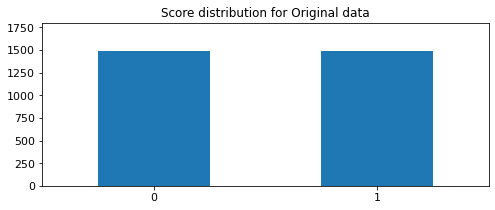

In [735]:
# See the distribution of original data and the sample data
# Plot barchart for X
data.score.value_counts().plot(kind = 'bar',
                                    title = 'Score distribution for Original data',
                                    ylim = [0, 1800],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

<AxesSubplot:title={'center':'Score distribution for Sample data'}>

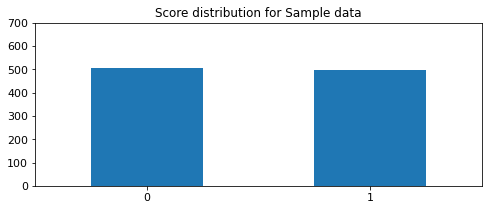

In [736]:
data_sample.score.value_counts().plot(kind = 'bar',
                                    title = 'Score distribution for Sample data',
                                    ylim = [0, 700],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

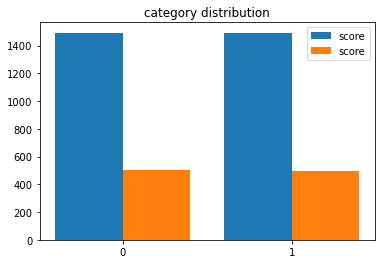

In [737]:
# Show the category in same graph
data_value_count = data.score.value_counts()
data_sample_count = data_sample.score.value_counts()
  
data_axis = np.arange(len(data_value_count))
  
plt.bar(data_axis - 0.2, data_value_count, 0.4, label = 'score')
plt.bar(data_axis + 0.2, data_sample_count, 0.4, label = 'score')
  

plt.xticks(data_axis, data_value_count.index)
plt.title("category distribution")
plt.legend()
plt.show()

### Feature creation

In [738]:
# Creat unigrams for each text
data['unigrams'] = data['sentence'].apply(lambda x: dmh.tokenize_text(x))
data[0:4]["unigrams"]

<ipython-input-738-5a440db92912>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [746]:
data

,sentence,score,unigrams
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,"[The, mic, is, great, .]"
...,...,...,...
2978,I think food should have flavor and texture an...,0,"[I, think, food, should, have, flavor, and, te..."
2979,Appetite instantly gone.,0,"[Appetite, instantly, gone, .]"
2980,Overall I was not impressed and would not go b...,0,"[Overall, I, was, not, impressed, and, would, ..."
2981,"The whole experience was underwhelming, and I ...",0,"[The, whole, experience, was, underwhelming, ,..."


In [747]:
data[0:1]['unigrams']

0    [So, there, is, no, way, for, me, to, plug, it...
Name: unigrams, dtype: object

In [763]:
# Feature subset creation
count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data.sentence) #learn the vocabulary and return document-term matrix
print(data_counts[0])

  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


In [750]:
data_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [751]:
count_vect.get_feature_names_out()[4161]

'so'

In [752]:
count_vect.get_feature_names_out()[4545]

'there'

In [753]:
# Build an analyzer
analyze = count_vect.build_analyzer()
analyze(data.sentence[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [754]:
data_counts.shape

(2983, 5155)

In [755]:
# We can obtain the feature names(the terms) of the vectorizer
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [756]:
data_counts[0:5, 0:50].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]], dtype=int64)

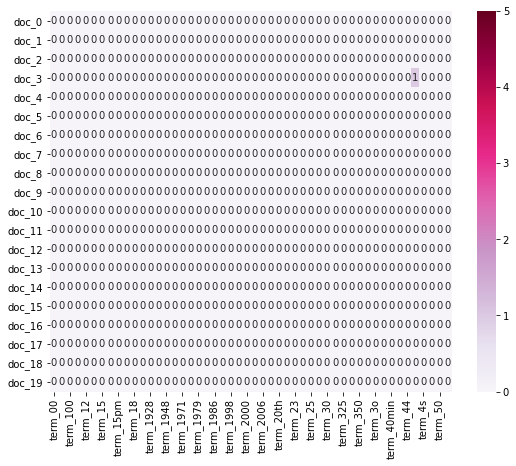

In [764]:
# Draw the heatmap
# Can't show useful information bcs of the sparse term metrics
term_num = 50
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:term_num]]
plot_y = ["doc_"+ str(i) for i in list(data.index)[0:20]]
plot_z = data_counts[0:20, 0:term_num].toarray() #X_counts[how many documents, how many terms]
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=5, annot=True)

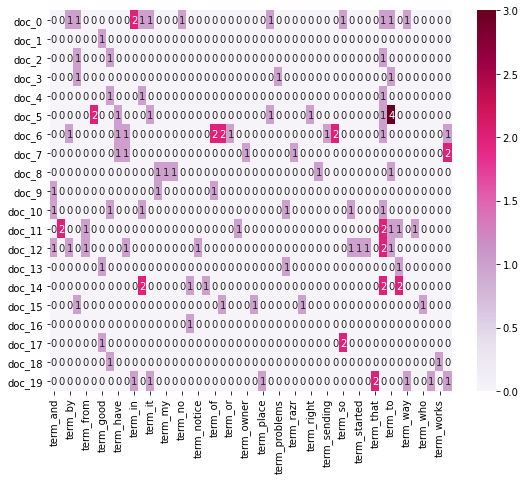

In [759]:
#Set max feature to 50, show the most common 50 word 
count_vect = CountVectorizer(max_features=50)
data_counts = count_vect.fit_transform(data[:20].sentence)
term_num = 50
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:term_num]]
plot_y = ["doc_"+ str(i) for i in list(data.index)[0:20]]
plot_z = data_counts[0:20, 0:term_num].toarray() #X_counts[how many documents, how many terms]
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=3, annot=True)

### Dimension reduction

In [765]:
# Turn the dimension of the data into 2
data_reduced = PCA(n_components = 2).fit_transform(data_counts.toarray())

In [766]:
data_reduced.shape

(2983, 2)

In [767]:
categories = [0, 1]

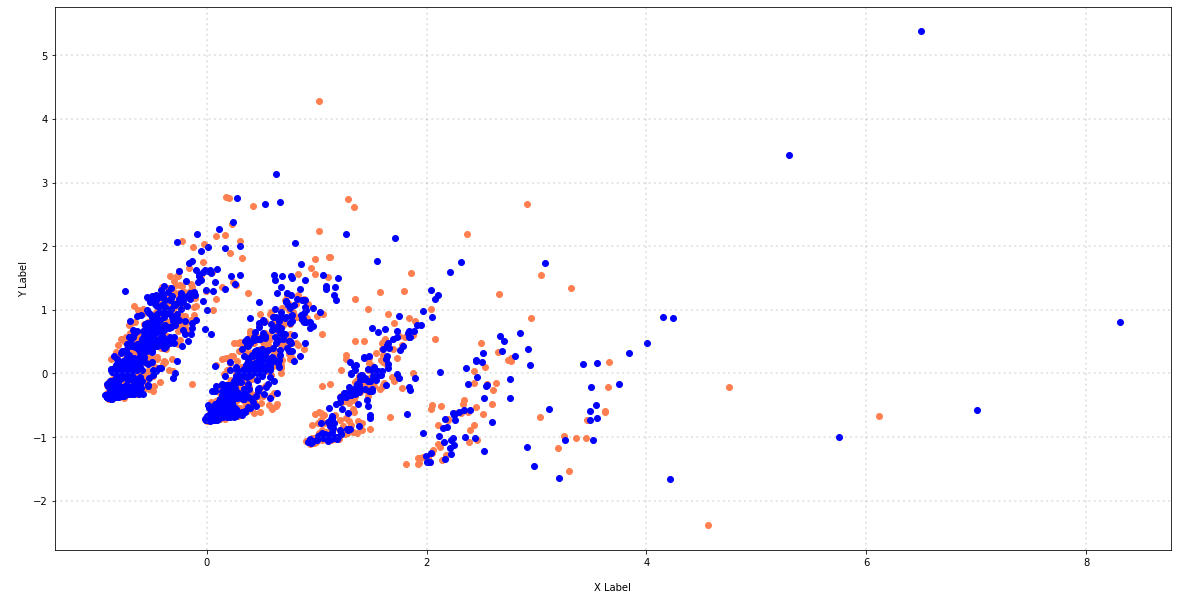

In [772]:
# Draw in 2D graph
col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (20,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = data_reduced[data['score'] == category].T[0]
    ys = data_reduced[data['score'] == category].T[1]
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

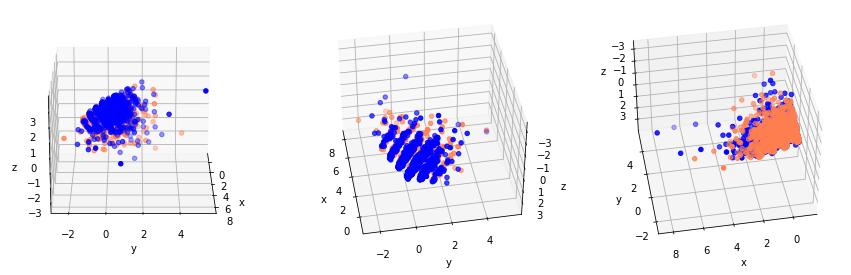

In [773]:
data_reduced_3 = PCA(n_components = 3).fit_transform(data_counts.toarray())
data_reduced_3.shape

# plot
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot(1, 3, 1, projection='3d')

for c, category in zip(col, categories):
    xs = data_reduced_3[data['score'] == category].T[0]
    ys = data_reduced_3[data['score'] == category].T[1]
    zs = data_reduced_3[data['score'] == category].T[2]
    ax.scatter(xs, ys, zs,  c = c, marker='o')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(20, 0)

ax = fig.add_subplot(1, 3, 2, projection='3d')
for c, category in zip(col, categories):
    xs = data_reduced_3[data['score'] == category].T[0]
    ys = data_reduced_3[data['score'] == category].T[1]
    zs = data_reduced_3[data['score'] == category].T[2]
    ax.scatter(xs, ys, zs,  c = c, marker='o')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(-140, 10)

ax = fig.add_subplot(1, 3, 3, projection='3d')
for c, category in zip(col, categories):
    xs = data_reduced_3[data['score'] == category].T[0]
    ys = data_reduced_3[data['score'] == category].T[1]
    zs = data_reduced_3[data['score'] == category].T[2]
    ax.scatter(xs, ys, zs,  c = c, marker='o')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(-140, 100)

plt.show()

### Attribute Transformation / Aggregation

In [774]:
# Caculate the term frequency
term_frequencies = []
for j in range(0, data_counts.shape[1]):
    term_frequencies.append(sum(data_counts[:,j].toarray()))

In [775]:
term_frequencies = np.asarray(data_counts.sum(axis=0))[0]
len(term_frequencies)

5155

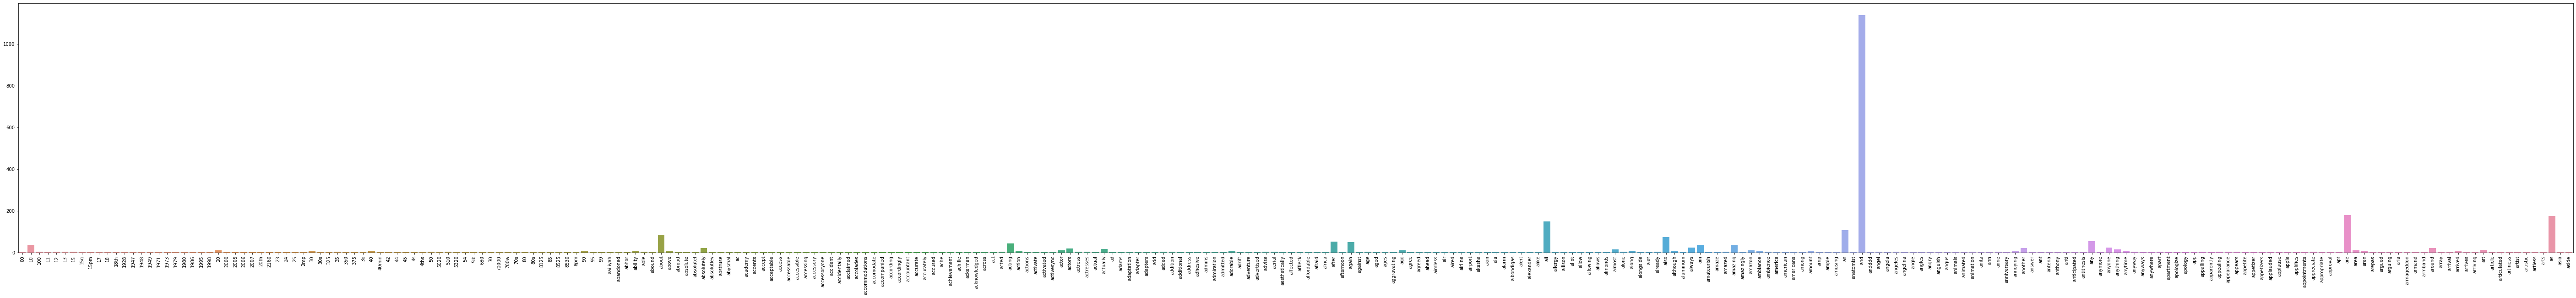

In [776]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [777]:
# Plot all the term on the graph
d = {'x': count_vect.get_feature_names_out()[:300], 'y': term_frequencies[:300]}
df = pd.DataFrame(data=d)
fig = px.bar(df, x='x', y='y')
fig.show()

In [778]:
# Only show the term that shows more than 20 times
d = {'x': count_vect.get_feature_names_out(), 'y': term_frequencies}
df = pd.DataFrame(data=d)
df = df[df['y']>20]
fig = px.bar(df, x='x', y='y')
fig.show()

In [779]:
# Sort the term frequency in decending order
d = {'x': count_vect.get_feature_names_out()[:300], 'y': term_frequencies[:300]}
df = pd.DataFrame(data=d)
df = df.sort_values(by=['y'], ascending=False)
fig = px.bar(df, x='x', y='y')
fig.show()

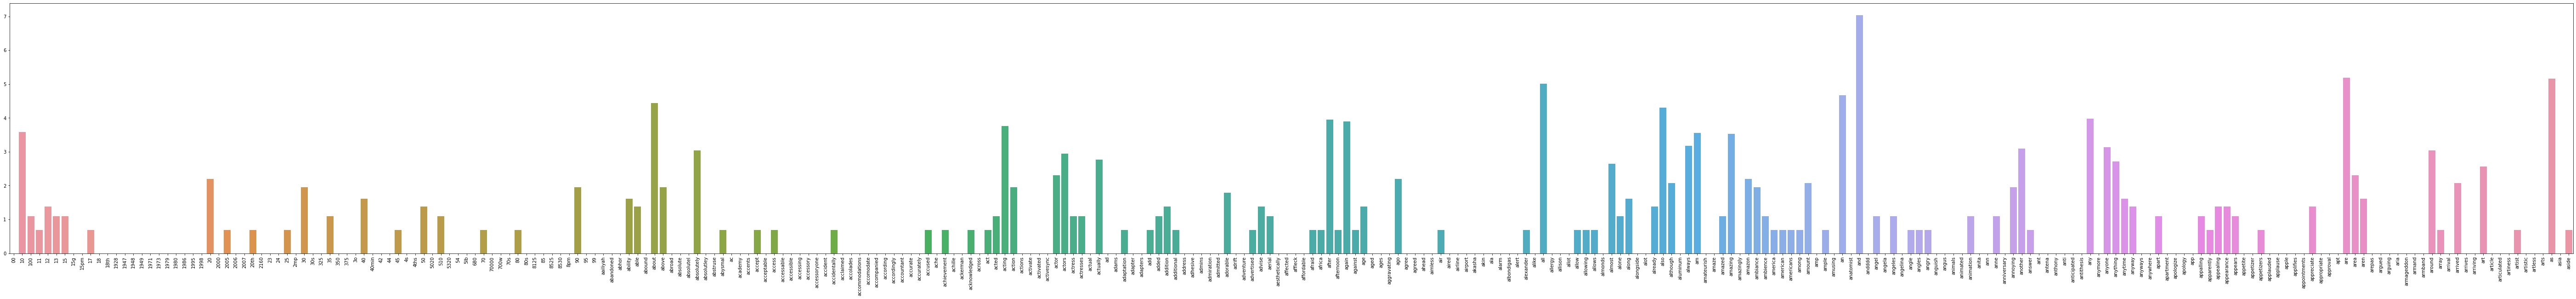

In [780]:
# Using log distribution to do the attribute transformation.
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### Discretization and Binarization

In [784]:
# Using label Binarizer to turn the label into one-hot encoding
mlb = preprocessing.LabelBinarizer()
mlb.fit(data.score)
data['bin_category'] = mlb.transform(data['score']).tolist()
data

<ipython-input-784-074a231f8123>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,sentence,score,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,"[The, mic, is, great, .]",[1]
...,...,...,...,...
2978,I think food should have flavor and texture an...,0,"[I, think, food, should, have, flavor, and, te...",[0]
2979,Appetite instantly gone.,0,"[Appetite, instantly, gone, .]",[0]
2980,Overall I was not impressed and would not go b...,0,"[Overall, I, was, not, impressed, and, would, ...",[0]
2981,"The whole experience was underwhelming, and I ...",0,"[The, whole, experience, was, underwhelming, ,...",[0]


### Data exploration

In [785]:
data.iloc[:50]

,sentence,score,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]
9,What a waste of money and time!.,0,"[What, a, waste, of, money, and, time, !, .]",[0]


In [786]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = data.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = data.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = data.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [787]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [788]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [526]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


# Third Part

#### Generate meaningful new data visualizations. Refer to online resources and the Data Mining textbook for inspiration and ideas.

In [789]:
# Collect all the words in postive sentence and negative sentence
from wordcloud import WordCloud, STOPWORDS 

postive_sentence = ''
negative_sentence = ''

for word_list in data[data.score == 1].unigrams:
    # Converts each token into lowercase
    for i in range(len(word_list)):
        word_list[i] = word_list[i].lower()
    postive_sentence += " ".join(word_list)+" "
        
for word_list in data[data.score == 0].unigrams:
     # Converts each token into lowercase
    for i in range(len(word_list)):
        word_list[i] = word_list[i].lower()
    negative_sentence += " ".join(word_list)+" "

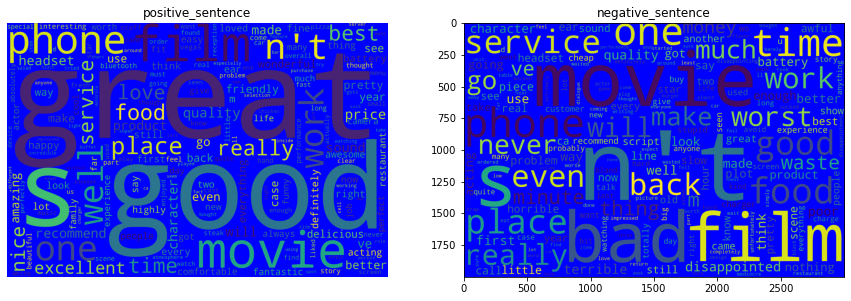

In [551]:
# Use wordcloud package to compare the most common words appear in postive sentence and negative sentence 
# Want to know if there is any difference between them
fig = plt.figure(figsize = (15, 30))
ax = fig.add_subplot(1, 2, 1)
#generate the wordcloud object, set the height and width, set the random_state parameter to ensure
# reproducibility of results and set the stopwords parameter so that the irrelevant words such as pronouns are discarded.
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='blue', collocations=False, stopwords = STOPWORDS).generate(postive_sentence )
# Display image
ax.set_title('positive_sentence')
ax.imshow(wordcloud) 
# No axis 
plt.axis("off")
ax = fig.add_subplot(1, 2, 2)
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='blue', collocations=False, stopwords = STOPWORDS).generate(negative_sentence )
# Display image
ax.set_title('negative_sentence')
ax.imshow(wordcloud)
plt.axis("off")
plt.show()

In positive wordcloud, we can see some positive word, like best, great, good.\
but there is also word good show in the negative wordcloud. I would like to know how does the word 'good' show in the negative sentence.

In [790]:
# Find the negative sentence that contains word good.
data[data.sentence.str.contains('good')][data.score==0][:10]

<ipython-input-790-06637f558e73>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,sentence,score,unigrams,bin_category
81,Not a good bargain.,0,"[not, a, good, bargain, .]",[0]
373,Not a good item.. It worked for a while then s...,0,"[not, a, good, item, .., it, worked, for, a, w...",[0]
453,Not good when wearing a hat or sunglasses.,0,"[not, good, when, wearing, a, hat, or, sunglas...",[0]
559,If you are looking for a good quality Motorola...,0,"[if, you, are, looking, for, a, good, quality,...",[0]
633,"However, BT headsets are currently not good fo...",0,"[however, ,, bt, headsets, are, currently, not...",[0]
635,Disappointing accessory from a good manufacturer.,0,"[disappointing, accessory, from, a, good, manu...",[0]
663,"Looks good in the picture, but this case was a...",0,"[looks, good, in, the, picture, ,, but, this, ...",[0]
737,"Couldn't use the unit with sunglasses, not goo...",0,"[could, n't, use, the, unit, with, sunglasses,...",[0]
761,I really wanted the Plantronics 510 to be the ...,0,"[i, really, wanted, the, plantronics, 510, to,...",[0]
798,At first I thought I was grtting a good deal a...,0,"[at, first, i, thought, i, was, grtting, a, go...",[0]


#### Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn guide .

In [791]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [792]:
tfidf_vect = TfidfVectorizer()  
data_tfidf = tfidf_vect.fit_transform(data.sentence)
data_tfidf = pd.DataFrame(data_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out(),  index=data.index)
print("TFIDF")
data_tfidf

TFIDF


,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [797]:
data_counts_show = pd.DataFrame(data_counts.toarray(), columns=count_vect.get_feature_names_out(),  index=data.index)
data_counts_show 

,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2981,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences. Refer to this article.

In [799]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB 

# Using Word frequency
X = data_counts.toarray()
y = data.score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
gnb_count = MultinomialNB()
y_pred = gnb_count.fit(X_train, y_train).predict(X_test)
print('Result of using word frequency')
print("Accuracy: %f"
      % ( (y_test == y_pred).sum()/X_test.shape[0]))

# Using Tf-idf
X = data_tfidf.to_numpy()
y = data.score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
gnb_count = MultinomialNB()
y_pred = gnb_count.fit(X_train, y_train).predict(X_test)
print('Result of using tfidf')
print('Accuracy: %f'
      % ( (y_test == y_pred).sum()/X_test.shape[0]))


Result of using word frequency
Accuracy: 0.797320
Result of using tfidf
Accuracy: 0.807370


# Forth Part

There are some of the data preprocessing part that use again and again, but if every time we have to specify all the detail may not be efficient.\
Instead, maybe we could modulize those function, we only pass the data and those parameter we specified, and get the useful result we need.\
Below is an example, I build up a function that can draw the term frequency graph, and can show different result based on your data, the lower frequency limit and whether to show it in descening order.


In [820]:
def term_frequency_graph(feature_names,  related_frequency, frequency_lower_limit=0, order=False):
    d = {'x': feature_names, 'y':related_frequency}
    df = pd.DataFrame(data=d)
    df = df[df['y']>frequency_lower_limit]
    if order:
        df = df.sort_values(by=['y'], ascending=False)
    fig = px.bar(df, x='x', y='y')
    fig.show()

In [815]:
# Want to get the term frequency graph that shows only the first 300 terms
term_frequency_graph(count_vect.get_feature_names_out()[:300], term_frequencies[:300])

In [816]:
# Want to get the graph that shows only the terms that occur more than 20 times
term_frequency_graph(count_vect.get_feature_names_out(), term_frequencies, 20)

In [819]:
# Want to get the graph that shows only the terms that occur more than 20 times, and show in descending order
term_frequency_graph(count_vect.get_feature_names_out(), term_frequencies, 20, True)

# Fifth Part

Put meaningful and useful comment on the code.